In [175]:
# !git clone https://github.com/VictorKuanglhu/DM2024-Lab2-Master.git
# %cd /content/DM2024-Lab2-Master

fatal: destination path 'DM2024-Lab2-Master' already exists and is not an empty directory.
/content/DM2024-Lab2-Master


In [176]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


Data source import complete.


In [177]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.10 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
langchain-community 0.3.10 requires numpy<2,>=1.22.4; python_version < "3.

In [178]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [179]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠼ pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏  29 KB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏ 1.5 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   2% ▕▏  25 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   4% ▕▏  51 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   5% ▕▏  65 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   7% ▕▏  97 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   9% ▕▏ 122 MB/1.3 GB    

In [180]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕▏   96 B                         
pulling 34bb5ab01051... 100% ▕▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


In [181]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 377876be20ba... 100% ▕▏ 2.3 GB                         
pulling 004fc0969720... 100% ▕▏ 607 MB                         
pulling c608dc615584... 100% ▕▏  149 B                         
pulling cadf483f03b5... 100% ▕▏  155 B                         
pulling 3921dac664c1... 100% ▕▏  492 B                         
verifying sha256 digest 
writing manifest 
success 


In [182]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [183]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [184]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [185]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [186]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [187]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


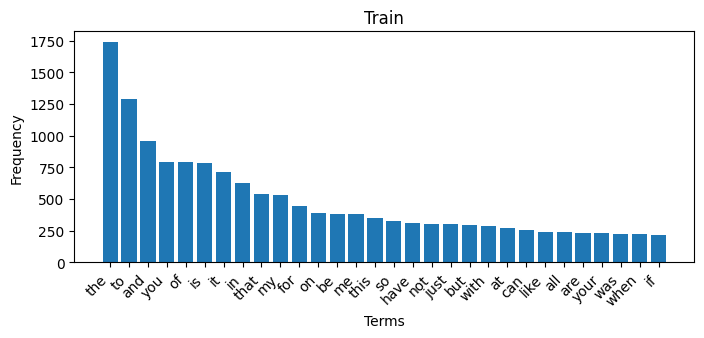

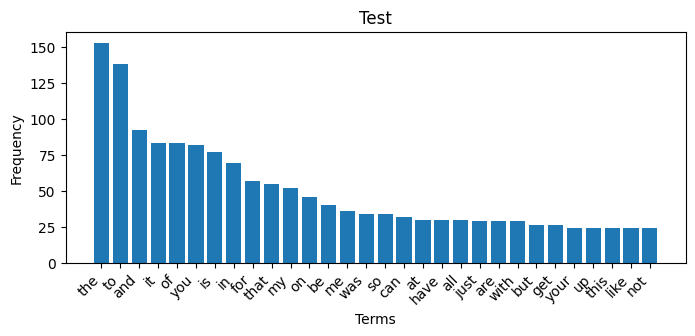

In [188]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_n_trem(df_text, n, title='Trem Frequency', xlabel='Terms', ylabel='Frequency'):
  count_vect = CountVectorizer()
  count = count_vect.fit_transform(df_text) #learn the vocabulary and return document-term matrix
  count = count.sum(axis=0).A1

  top_n_count_idx = np.argsort(count)[-1:-n-1:-1]
  top_n_trem = count_vect.get_feature_names_out()[top_n_count_idx]
  top_n_frequency = count[top_n_count_idx]

  plt.figure(figsize=(8,3))
  plt.bar(top_n_trem, top_n_frequency)
  plt.xticks(rotation=45, ha='right')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

plot_top_n_trem(train_df.text, 30, title="Train")
plot_top_n_trem(test_df.text, 30, title="Test")

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [189]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [190]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [191]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


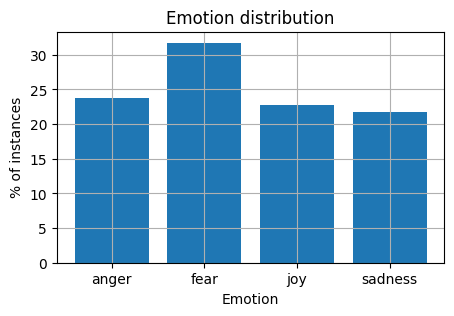

In [192]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

In [194]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [195]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [196]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [197]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [198]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [199]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [200]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [201]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [202]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [203]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [204]:
train_data_BOW_features_500.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [205]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [206]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [207]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)   # Initialize the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df.text)  # Transform text into a TF-IDF feature matrix

tfidf_vectorizer.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [208]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [209]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'anger', 'fear', 'fear', 'fear', 'anger',
       'anger', 'anger', 'sadness'], dtype=object)

In [210]:
y_train_pred

array(['fear', 'sadness', 'joy', ..., 'joy', 'sadness', 'sadness'],
      dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [211]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [212]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [213]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [214]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

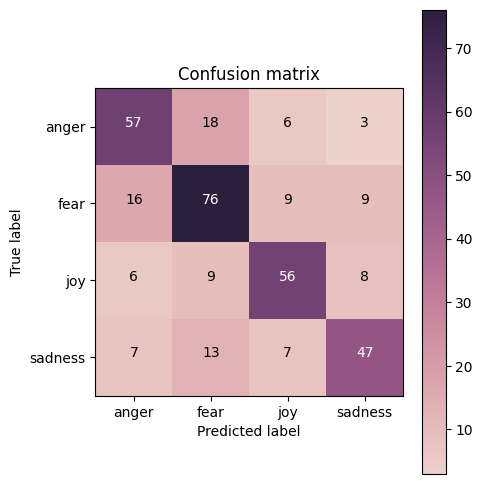

In [215]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

1. The diagonal is clearly darker, indicating that the model has significant predictive power.

2. Compared to fear, anger, and sadness, sentences classified as joy might have lower word similarity with the other three emotions. This makes it easier for the model to avoid confusing joy with fear, anger, or sadness (higher precision for joy).

3. From the EDA data distribution, we can see that although the four emotion categories are relatively balanced, fear has slightly more samples than the others. This is why the "true" and "predicted" values for fear in the confusion matrix appear slightly darker than for other emotions. This visual effect is caused by the absolute number difference.

In [1]:
# Answer here
'''
1. The diagonal is clearly darker, indicating that the model has significant predictive power.

2. Compared to fear, anger, and sadness, sentences classified as joy might have lower word
  similarity with the other three emotions. This makes it easier for the model to avoid
  confusing joy with fear, anger, or sadness (higher precision for joy).

3. From the EDA data distribution, we can see that although the four emotion categories are
  relatively balanced, fear has slightly more samples than the others. This is why the
  "true" and "predicted" values for fear in the confusion matrix appear slightly darker
  than for other emotions. This visual effect is caused by the absolute number difference.
'''

'\n1. The diagonal is clearly darker, indicating that the model has significant predictive power.\n\n2. Compared to fear, anger, and sadness, sentences classified as joy might have lower word \n  similarity with the other three emotions. This makes it easier for the model to avoid \n  confusing joy with fear, anger, or sadness (higher precision for joy).\n  \n3. From the EDA data distribution, we can see that although the four emotion categories are \n  relatively balanced, fear has slightly more samples than the others. This is why the \n  "true" and "predicted" values for fear in the confusion matrix appear slightly darker \n  than for other emotions. This visual effect is caused by the absolute number difference.\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



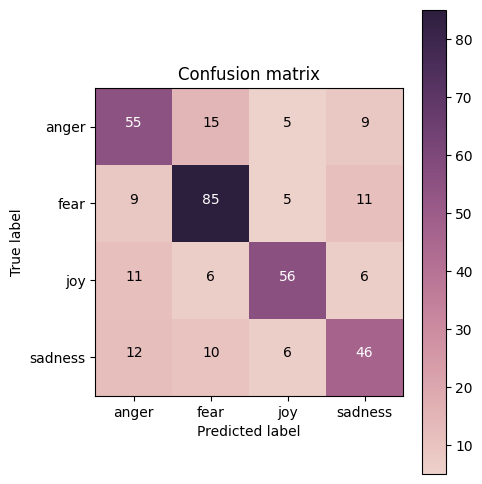

In [217]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
x_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

y_test_pred = nb_classifier.predict(x_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred, labels=nb_classifier.classes_))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=nb_classifier.classes_)
plot_confusion_matrix(cm, classes=nb_classifier.classes_)

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [218]:
# Answer here
'''
In this experiment, the bag-of-words approach was used to extract the 500 most
frequent terms as features. Both models are suitable for handling problems where
features (terms) are independent of each other.

The Decision Tree splits branches based on Information Gain. However, Information
Gain is biased toward multivalued attributes. In imbalanced datasets, samples with
a larger base (like fear) have a higher likelihood of containing more values for
the same features (terms). This leads to a stronger bias toward predicting fear,
resulting in lower precision for fear. Additionally, Decision Trees are more prone
to overfitting, which makes their overall performance worse than Naive Bayes in this case.

Naive Bayes, on the other hand, is based on conditional probability. From the
experimental results, it can handle slight imbalances in sample data effectively.
Moreover, Naive Bayes demonstrates good performance when dealing with high-dimensional
and weakly correlated features, resulting in better overall performance.
'''

'\nIn this experiment, the bag-of-words approach was used to extract the 500 most \nfrequent terms as features. Both models are suitable for handling problems where \nfeatures (terms) are independent of each other.\n\nThe Decision Tree splits branches based on Information Gain. However, Information \nGain is biased toward multivalued attributes. In imbalanced datasets, samples with \na larger base (like fear) have a higher likelihood of containing more values for \nthe same features (terms). This leads to a stronger bias toward predicting fear, \nresulting in lower precision for fear. Additionally, Decision Trees are more prone \nto overfitting, which makes their overall performance worse than Naive Bayes in this case.\n\nNaive Bayes, on the other hand, is based on conditional probability. From the \nexperimental results, it can handle slight imbalances in sample data effectively. \nMoreover, Naive Bayes demonstrates good performance when dealing with high-dimensional \nand weakly corr

In this experiment, the bag-of-words approach was used to extract the 500 most frequent terms as features. Both models are suitable for handling problems where features (terms) are independent of each other.

The Decision Tree splits branches based on Information Gain. However, Information Gain is biased toward multivalued attributes. In imbalanced datasets, samples with a larger base (like fear) have a higher likelihood of containing more values for the same features (terms). This leads to a stronger bias toward predicting fear, resulting in lower precision for fear. Additionally, Decision Trees are more prone to overfitting, which makes their overall performance worse than Naive Bayes in this case.

Naive Bayes, on the other hand, is based on conditional probability. From the experimental results, it can handle slight imbalances in sample data effectively. Moreover, Naive Bayes demonstrates good performance when dealing with high-dimensional and weakly correlated features, resulting in better overall performance.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [219]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [220]:
import keras

In [221]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [222]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1647       fear
3035    sadness
2377        joy
2641        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [223]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [224]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [225]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 512ms/step - accuracy: 0.3255 - loss: 1.3620 - val_accuracy: 0.4294 - val_loss: 1.2932
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 182ms/step - accuracy: 0.5952 - loss: 1.1076 - val_accuracy: 0.6455 - val_loss: 0.9326
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.7825 - loss: 0.6214 - val_accuracy: 0.6715 - val_loss: 0.7755
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8637 - loss: 0.4040 - val_accuracy: 0.6916 - val_loss: 0.7908
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8928 - loss: 0.3041 - val_accuracy: 0.6801 - val_loss: 0.8259
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9227 - loss: 0.2468 - val_accuracy: 0.6801 - val_loss: 0.8799
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9329 - loss: 0.2096 - val_accuracy: 0.6744 - val_loss: 0.9289
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9510 - loss: 0.1744 - va

### 6.5 Predict on testing data

In [226]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step


array([[6.1351472e-01, 9.5261370e-05, 4.0101735e-05, 3.8634989e-01],
       [1.6884230e-02, 4.5375486e-08, 5.9574808e-04, 9.8252004e-01],
       [4.0969384e-01, 3.5734028e-02, 5.4864544e-01, 5.9267064e-03],
       [5.2712369e-07, 9.9918681e-01, 1.1802339e-05, 8.0083881e-04],
       [9.7406477e-01, 2.8827821e-03, 2.3139928e-05, 2.3029318e-02]],
      dtype=float32)

In [227]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'joy', 'fear', 'anger'], dtype=object)

In [228]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [55]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.375311,1.326952,0.432277,1.269426
1,1,0.639911,0.992990,0.645533,0.923359
2,2,0.795461,0.591824,0.694524,0.786282
3,3,0.846111,0.425536,0.694524,0.797115
4,4,0.875173,0.339758,0.682997,0.831840
5,5,0.902851,0.277181,0.677233,0.864543
6,6,0.921948,0.233056,0.662824,0.955404
7,7,0.934404,0.197590,0.657061,1.028813
8,8,0.947412,0.166599,0.677233,1.069382
9,9,0.956269,0.145637,0.671470,1.105549


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

<table><tr>
    <td><img src="https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>


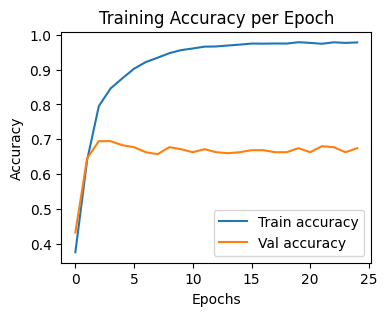

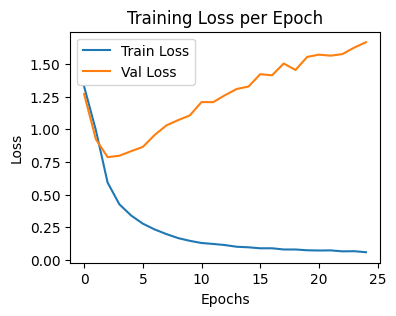

In [56]:
# Answer here
training_log = pd.read_csv("logs/training_log.csv")

training_log[["accuracy", "val_accuracy"]].plot(figsize=(4, 3), title="Training Accuracy per Epoch")
plt.legend(["Train accuracy", "Val accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

training_log[["loss", "val_loss"]].plot(figsize=(4, 3), title="Training Loss per Epoch")
plt.legend(["Train Loss", "Val Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [57]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3162,40335,@WestermannNina xDD it's a song that can not b...,"[@, WestermannNina, xDD, it, 's, a, song, that..."
1473,20616,One more step in long work #visa process is ov...,"[One, more, step, in, long, work, #, visa, pro..."
572,10572,the 1975 are playing antichrist why won't @sun...,"[the, 1975, are, playing, antichrist, why, wo,..."
2035,30031,@ADenkyirah Happy birthday! Hope you have a wo...,"[@, ADenkyirah, Happy, birthday, !, Hope, you,..."
3437,40610,Transparency and openness ' is a dull sell for...,"[Transparency, and, openness, ', is, a, dull, ..."


In [58]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'WestermannNina', 'xDD', 'it', "'s", 'a', 'song', 'that', 'can', 'not', 'be', 'weary', '(', '?', ')']),
       list(['One', 'more', 'step', 'in', 'long', 'work', '#', 'visa', 'process', 'is', 'over', '.', 'Relief', '.', 'Onto', 'next', 'step', '.', '#', 'expat', '#', 'restless']),
       list(['the', '1975', 'are', 'playing', 'antichrist', 'why', 'wo', "n't", '@', 'sundarakarma', 'play', 'hustle', 'it', "'s", 'an', 'outrage'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [59]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [60]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.54169697,  0.18593083, -0.2658747 ,  0.11982666,  0.10927938,
       -1.1343527 ,  0.47169065,  1.1116184 , -0.7965509 , -0.5180149 ,
       -0.5748826 , -0.8951364 , -0.34366542,  0.22634174,  0.22811426,
       -0.4474035 ,  0.13513935, -0.64712876,  0.6818165 , -1.3188076 ,
        0.67781496,  0.6869036 ,  0.7192774 ,  0.01548549,  0.27967194,
        0.20005937, -0.7059735 ,  0.61843437, -0.4250893 ,  0.10640707,
        0.3040548 , -0.31421536,  1.0343332 , -0.046044  , -0.558591  ,
        0.3850138 ,  0.3019939 , -0.06370422, -0.7006176 , -0.7422185 ,
        0.5450181 ,  0.29368234,  0.04517092,  0.33673394,  0.4953697 ,
       -0.1383332 , -0.7416331 , -0.27200916,  0.5523748 ,  0.40109223,
       -0.14339428, -0.20240682, -0.2724272 , -0.16988751, -0.4170809 ,
       -0.21557644,  0.08749126, -0.08835154, -0.37228855, -0.210108  ,
       -0.1584754 ,  0.13937785,  0.4929489 ,  0.0119774 , -0.5933671 ,
        0.97571677,  0.4042405 ,  0.46963677, -1.3332778 ,  0.37

In [61]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('bday', 0.9360980987548828),
 ('blessed', 0.9206264019012451),
 ('blessing', 0.9122284054756165),
 ('keeping', 0.9121307134628296),
 ('birthday', 0.907081663608551),
 ("'you", 0.9039598107337952),
 ('help', 0.9035676717758179),
 ('Be', 0.9002803564071655),
 ('muslims', 0.8960574865341187),
 ('romance', 0.8958152532577515)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

# print("Path to dataset files:", path)

!mkdir -p ./GoogleNews
!mv {path}/GoogleNews-vectors-negative300.bin.gz ./GoogleNews

100%|██████████| 3.17G/3.17G [00:41<00:00, 83.1MB/s]

Extracting files...


In [63]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [64]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [65]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [66]:
# Answer here
'''
To represent sentence data using word vectors, we can simply add all the
word vectors in a sentence together. The more trems in the sentence that
are related to the topic, the higher the corresponding feature values will be,
and vice versa. This approach can be valuable in applications like topic analysis.

For more complex applications, such as semantic understanding or response generation,
sequence models can be used. For instance, RNNs (Recurrent Neural Networks) can use
the last token's output to represent the sentence, or BERT models can utilize the
CLS token to generate a sentence representation based on the context.
'''

"\nTo represent sentence data using word vectors, we can simply add all the \nword vectors in a sentence together. The more trems in the sentence that \nare related to the topic, the higher the corresponding feature values will be, \nand vice versa. This approach can be valuable in applications like topic analysis.\n\nFor more complex applications, such as semantic understanding or response generation, \nsequence models can be used. For instance, RNNs (Recurrent Neural Networks) can use \nthe last token's output to represent the sentence, or BERT models can utilize the \nCLS token to generate a sentence representation based on the context.\n"

To represent sentence data using word vectors, we can simply add all the word vectors in a sentence together. The more trems in the sentence that are related to the topic, the higher the corresponding feature values will be, and vice versa. This approach can be valuable in applications like topic analysis.

For more complex applications, such as semantic understanding or response generation, sequence models can be used. For instance, RNNs (Recurrent Neural Networks) can use the last token's output to represent the sentence, or BERT models can utilize the CLS token to generate a sentence representation based on the context.

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [67]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [68]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cdb00785510>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [69]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [70]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [71]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

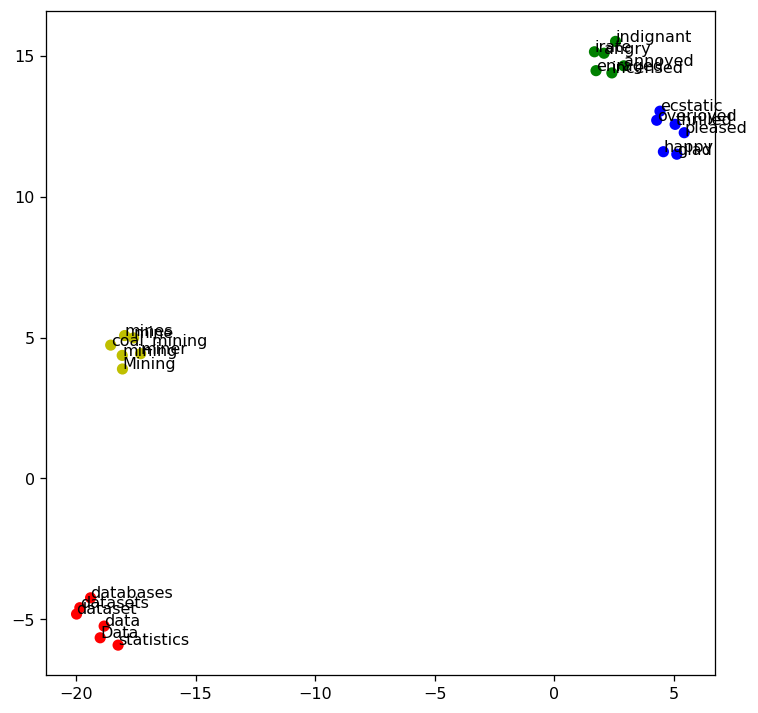

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

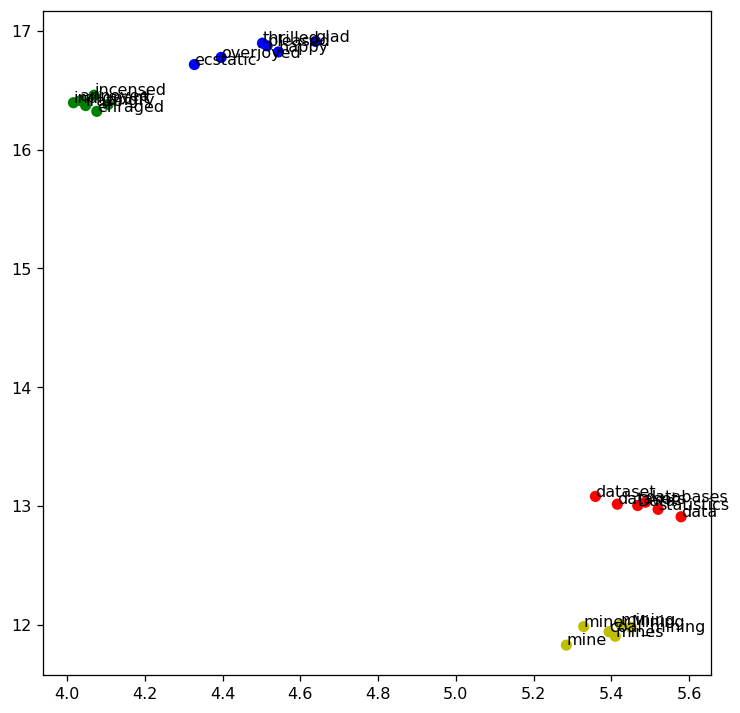

In [73]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

target words lenght: 4 + 60


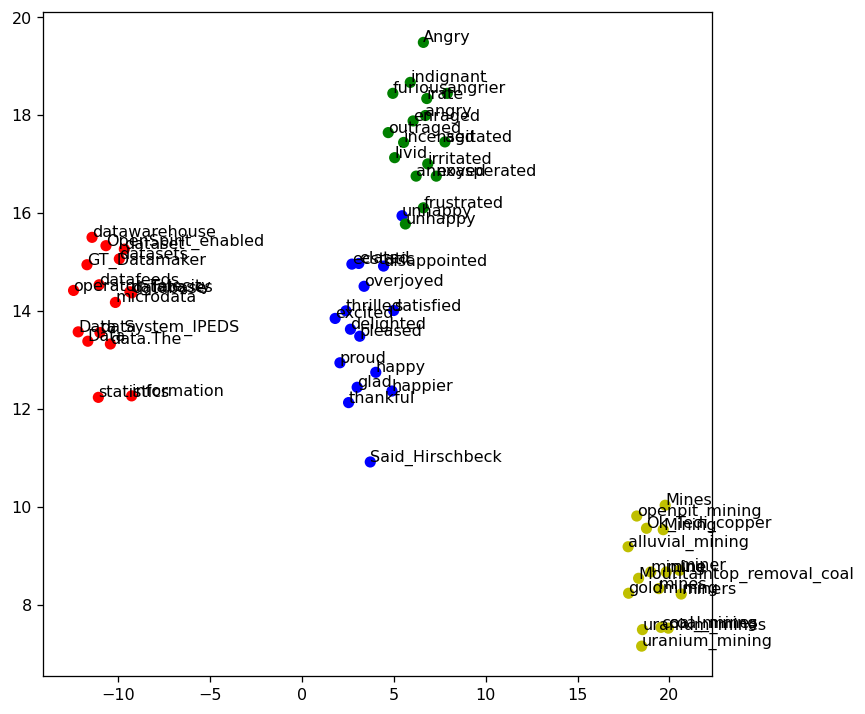

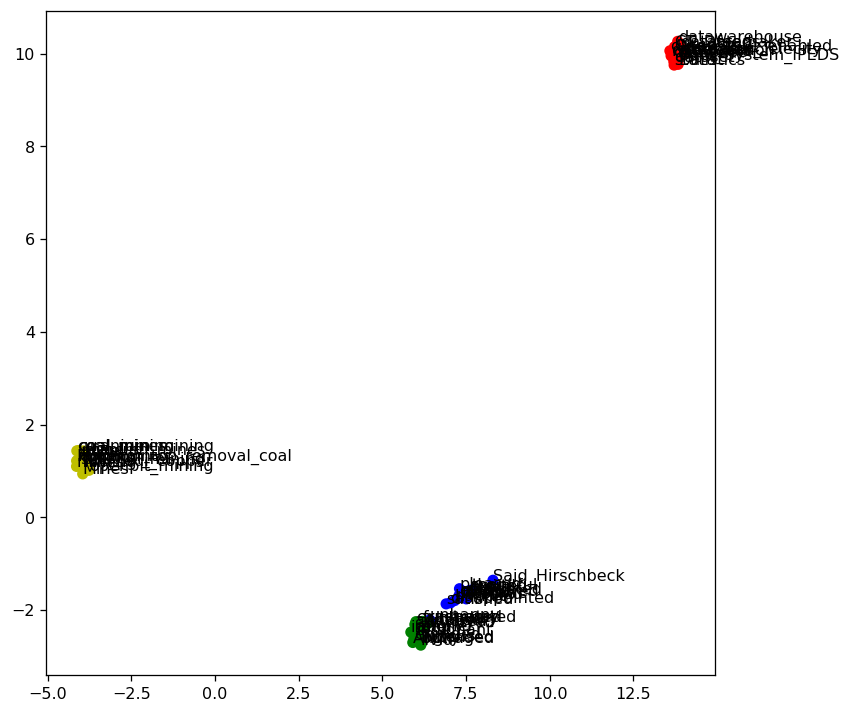

In [74]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

target_words = happy_words + angry_words + data_words + mining_words
color = ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['r'] * (topn + 1) + ['y'] * (topn + 1)

print(f'target words lenght: 4 + {topn*4}')


## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]


## models
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
algorithms = [tsne, umap_model]

for alg in algorithms:
  ## training
  X_reduced = alg.fit_transform(X_train)

  ## plot the result
  plt.figure(figsize=(7.5, 7.5), dpi=115)
  plt.scatter(X_reduced[:target_size, 0], X_reduced[:target_size, 1], c=color)
  for label, x, y in zip(target_words, X_reduced[:target_size, 0], X_reduced[:target_size, 1]):
      plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
  plt.show()

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [75]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets using various algorithms and statistical techniques.

### Types of Data Mining

#### 1. **Supervised Learning**

*   The algorithm is trained on labeled data to learn patterns and relationships.
*   Used for predictive modeling, classification, and regression tasks.

#### 2. **Unsupervised Learning**

*   The algorithm is not trained on labeled data and identifies patterns in the data.
*   Used for clustering, dimensionality reduction, and anomaly detection.

#### 3. **Semi-Supervised Learning**

*   A combination of supervised and unsupervised learning techniques.
*   Used when there is limited labeled data available.

### Data Mining Techniques

1.  **Association Rule Learning**: Identifies relationships between items in a dataset.
2.  **Classification**: Assigns categories or labels to new data points based on patterns learned from the tr

**We can use the IPython library to make the response look better:**

In [76]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown*
$\phi$'))

*some markdown* $\phi$

In [77]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets using various algorithms and statistical techniques.

### Types of Data Mining

#### 1. **Supervised Learning**

*   The algorithm is trained on labeled data to learn patterns and relationships.
*   Used for predictive modeling, classification, and regression tasks.

#### 2. **Unsupervised Learning**

*   The algorithm is not trained on labeled data and identifies patterns in the data.
*   Used for clustering, dimensionality reduction, and anomaly detection.

#### 3. **Semi-Supervised Learning**

*   A combination of supervised and unsupervised learning techniques.
*   Used when there is limited labeled data available.

### Data Mining Techniques

1.  **Association Rule Learning**: Identifies relationships between items in a dataset.
2.  **Classification**: Assigns categories or labels to new data points based on patterns learned from the training data.
3.  **Clustering**: Groups similar data points into clusters based on their characteristics.
4.  **Regression Analysis**: Predicts continuous values based on patterns learned from the training data.

### Data Mining Applications

1.  **Marketing**: Customer segmentation, recommendation systems, and market basket analysis.
2.  **Finance**: Credit risk assessment, portfolio optimization, and fraud detection.
3.  **Healthcare**: Disease diagnosis, personalized medicine, and patient outcomes prediction.
4.  **Sports Analytics**: Player performance analysis, team strategy development, and fan engagement optimization.

### Benefits of Data Mining

1.  **Improved Decision Making**
2.  **Increased Efficiency**
3.  **Enhanced Customer Experience**
4.  **Competitive Advantage**

### Challenges in Data Mining

1.  **Data Quality Issues**: Inconsistent or missing data can lead to biased results.
2.  **Overfitting**: Models that are too complex can result in poor performance on new data.
3.  **Scalability**: Handling large datasets can be computationally expensive.
4.  **Interpretability**: Understanding the insights and patterns learned from data can be challenging.

### Best Practices for Data Mining

1.  **Data Preprocessing**: Clean and preprocess data before modeling.
2.  **Feature Engineering**: Select relevant features that impact the problem.
3.  **Model Evaluation**: Use metrics to evaluate model performance.
4.  **Regularization Techniques**: Prevent overfitting by using regularization techniques.

### Tools for Data Mining

1.  **Python Libraries**: Scikit-learn, TensorFlow, and PyTorch
2.  **R Packages**: caret, dplyr, and ggplot2
3.  **Data Visualization Tools**: Tableau, Power BI, and Matplotlib


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [104]:
# Answer here
'''
Reference: https://github.com/ollama/ollama/blob/main/docs/api.md
  "role: the role of the message, either system, user, assistant, or tool"
'''

import ollama
response_ex09 = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are an expert data scientist who provides concise and accurate responses about data mining.'
    },
    {
        'role': 'user',
        'content': 'Can you explain what Word2Vec is and how it works?'
    },
])

print(f"Role: {response['message']['role']}")
display(Markdown(response_ex09['message']['content']))

Role: assistant


**Word2Vec: A Deep Learning Technique for Vectorizing Words**

Word2Vec is a popular deep learning technique used in natural language processing (NLP) to convert words into vectors, capturing their semantic relationships. Developed by Mikolov et al., Word2Vec is widely used in various NLP tasks, such as text classification, sentiment analysis, and machine translation.

**How Word2Vec Works:**

Word2Vec uses a neural network architecture called a skip-gram model to predict the context words surrounding a given word. The process involves the following steps:

1. **Training Data:** A large corpus of text is preprocessed into a set of tokens (words or subwords).
2. **Skip-Gram Model:** Two main types of Word2Vec models are used: Continuous Bag of Words (CBOW) and Skip-Gram.
	* **CBOW (Context-Based Word Embedding):** Predicts the target word based on its context words.
	* **Skip-Gram (Word-to-Word Word Embedding):** Predicts the context words surrounding a given word.
3. **Neural Network Architecture:** Each word is represented as a dense vector in a high-dimensional space (typically 300-1000 dimensions). The neural network consists of:
	+ Input layer: receives the input word
	+ Hidden layers: uses LSTM or GRU units to learn contextual information
	+ Output layer: predicts the target word and context words
4. **Loss Function:** The model is trained using a combination of masked language modeling (predicting missing words) and next sentence prediction tasks.
5. **Optimization:** The model is optimized using stochastic gradient descent (SGD) or other optimization algorithms.

**How Word2Vec Vectors are Learned:**

During training, the neural network learns to predict the context words surrounding a given word by minimizing a loss function that measures the difference between predicted and actual words. The Word2Vec vector for each word is learned by optimizing the output layer of the neural network. This process results in a set of dense vectors that capture semantic relationships between words.

**Advantages:**

* Captures nuanced semantic relationships between words
* Allows for efficient representation and manipulation of text data
* Can be used for various NLP tasks, such as word similarity, classification, and clustering

Word2Vec has become a fundamental technique in NLP research and has been widely adopted in industry applications. Its ability to learn contextual representations has revolutionized the field, enabling more accurate and informative models for natural language processing tasks.

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [105]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the heart of a vibrant green field, a small dog with tan and white fur is captured in mid-air. The dog's body is stretched out horizontally, its legs reaching towards the sky as if it's just launched off the ground. Its tail stands straight up, adding to the sense of motion in the image. The dog's mouth is wide open, and its tongue is sticking out in a playful manner. The background, though blurred due to the focus on the foreground, reveals a fence running along the edge of the field and trees standing tall in the distance. This energetic scene encapsulates a moment of pure joy and freedom as the dog revels in its outdoor playtime.

In [106]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image features a **tabby cat** with distinctive **gray and black stripes**. The cat's body is primarily gray, adorned with black stripes running horizontally along its sides. Its head showcases lighter shades of gray interspersed with black stripes on the forehead and nose. 

The cat stands upright on all fours against a **white background**, its tail curved upwards in a playful manner. It faces the camera directly, giving us a clear view of its features. The cat's position and gaze suggest it is alert and attentive to its surroundings. 

Overall, the image captures a moment of quiet curiosity from this charming tabby cat.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

![example2.jpg](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/ext1.jpg?raw=true)

In [115]:
# Answer here
'''
The model accurately described the scene in the image and correctly identified
  what was unusual about it. Notably, the model defined the image as "which is
  not commonly seen" rather than questioning the authenticity of the image.
'''

response_ex10 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is unusual about this image?',
        'images': ['./pics/ext1.jpg']
    },
])

display(Markdown(response_ex10['message']['content']))

The unusual aspect of the image is that a man, wearing a yellow shirt and holding a blue towel, is ironing clothes on top of a luggage rack in the back of an SUV. Typically, one would expect to see such activities taking place inside a house or laundry room rather than being carried out in an unconventional setting like the back of a moving vehicle. The scene presents a unique and unexpected scenario as it captures the man engaging with household chores amidst the confined space of the SUV's luggage rack, which is not commonly seen.

The model accurately described the scene in the image and correctly identified what was unusual about it. Notably, the model defined the image as "which is not commonly seen" rather than questioning the authenticity of the image.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [137]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    # print(f'splits: {splits}') #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

Based on the context provided, related solutions of IBM with LLMs are likely to be:

1. Watson Assistant: A cloud-based AI service that uses natural language understanding (NLU) and natural language processing (NLP) capabilities to help businesses create conversational interfaces with their customers.
2. Watson Content Hub: An enterprise content management platform that leverages LLMs to analyze, categorize, and provide insights on vast amounts of unstructured data.
3. Watson Language Translator: A cloud-based service that uses LLMs to translate text and speech in real-time, breaking language barriers for businesses operating globally.
4. IBM Knowledge Center: An AI-powered platform that uses LLMs to provide personalized support and knowledge management solutions for customers.
5. IBM Watson Discovery: A cloud-based data discovery and analytics platform that leverages LLMs to analyze unstructured data from various sources.

These are just a few examples of IBM's related solutions with LLMs, which have been developed over the years to enhance their NLU and NLP capabilities.


### **Actual content in the URL:**
![pic11.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [148]:
from posixpath import join
# Answer here
llm_model = "llama3.2" #You can change to the one of your preference

urls=("https://www.investopedia.com/terms/b/bitcoin.asp",
    "https://icoholder.com/blog/understanding-bitcoin-mining-process-benefits-and-challenges/",
    "https://www.markets.com/education-centre/real-world-use-cases-of-bitcoin/",)

# Create retrievers
retrievers = [load_and_retrieve_docs(url) for url in urls]

# Define the RAG chain
def rag_chain_ex11(question):
    retrieved_docs_list = [retriever.invoke(question) for retriever in retrievers]
    formatted_context_list = [format_docs(retrieved_docs) for retrieved_docs in retrieved_docs_list]
    return ollama_llm(question, '\n\n'.join(formatted_context_list))

# Use the RAG chain
questions = ("What is Bitcoin, and how does it work?",
        "How does Bitcoin mining work, and what are its environmental impacts?",
        "How does Bitcoin protect itself from a 51% attack?",
        "What are some practical applications of Bitcoin in today's economy?")
results = {question:rag_chain_ex11(question) for question in questions}

for q, a in results.items():
  print(f'Question: {q}')
  print(f'Answer: ',end='')
  display(Markdown(a))
  print('\n\n'+'-'*20)

Question: What is Bitcoin, and how does it work?
Answer: 

Bitcoin is a decentralized digital currency that allows for peer-to-peer transactions without the need for a central authority or intermediary. It was created in 2009 by an anonymous individual or group using the pseudonym Satoshi Nakamoto.

Here's how it works:

1. **Blockchain**: Bitcoin uses a decentralized ledger called a blockchain to record all transactions. The blockchain is a chain of blocks, each containing a list of transactions.
2. **Mining**: New Bitcoins are created through a process called mining, which involves solving complex mathematical problems using powerful computers. Miners compete to solve these problems first, and the first one to solve it gets to add a new block to the blockchain and is rewarded with newly minted Bitcoins.
3. **Transactions**: When a user wants to send Bitcoin to another user, they create a transaction and broadcast it to the network. The transaction is verified by special nodes on the network called "nodes," which check that the sender has the necessary Bitcoins to make the transfer.
4. **Block reward**: Miners are rewarded with newly minted Bitcoins for adding new blocks to the blockchain. This reward is currently set at 6.25 BTC per block, and it's halved every four years according to the Bitcoin protocol.
5. **Wallets**: Users store their Bitcoins in digital wallets, which can be software-based or hardware-based. These wallets allow users to send, receive, and manage their Bitcoins.

The key features of Bitcoin that make it unique include:

1. **Decentralization**: Bitcoin is not controlled by any government or institution.
2. **Security**: The use of cryptography and the decentralized nature of the blockchain make it difficult for hackers to manipulate or steal Bitcoins.
3. **Limited supply**: The total supply of Bitcoins is capped at 21 million, which helps to maintain its value over time.

Bitcoin has gained popularity as a store of value and investment vehicle, but it's also used for everyday transactions, such as buying goods and services from merchants who accept Bitcoin.

In summary, Bitcoin is a decentralized digital currency that uses a blockchain to record transactions, and it's created through mining. It has a limited supply, and its value can fluctuate based on market forces.



--------------------
Question: How does Bitcoin mining work, and what are its environmental impacts?
Answer: 

I'll provide information on how Bitcoin mining works and its environmental impacts.

Bitcoin mining is a process that involves solving complex mathematical problems to validate transactions on the Bitcoin network and add new blocks to the blockchain. Miners use powerful computers to solve these problems, which require significant amounts of energy to operate.

Here's a simplified overview of the process:

1. Transactions are broadcast to the Bitcoin network.
2. A group of nodes (computer servers) verifies the transactions and selects the ones that will be included in the next block.
3. Miners compete to solve a complex mathematical puzzle, which requires significant computational power.
4. The first miner to solve the puzzle gets to add a new block to the blockchain and broadcast it to the network.
5. Once a block is added, the transactions in that block are verified and confirmed on the blockchain.

The environmental impact of Bitcoin mining is a topic of ongoing debate. Here are some factors to consider:

1. Energy consumption: The energy required to mine Bitcoin is significant, with estimates suggesting that around 60 TWh of electricity is consumed annually. This is equivalent to the annual energy consumption of a small country like Switzerland.
2. Greenhouse gas emissions: The production of electricity used for mining contributes to greenhouse gas emissions, which contribute to climate change.
3. e-Waste generation: The use of powerful computers and energy-intensive equipment in mining can lead to electronic waste (e-waste) generation.
4. Water usage: Some mining operations require significant amounts of water to cool the equipment.

However, it's worth noting that some mining companies are exploring more sustainable practices, such as:

1. Renewable energy sources: Using renewable energy sources like solar or wind power to generate electricity for mining operations.
2. Energy-efficient equipment: Developing and using more energy-efficient mining equipment.
3. Cooling systems: Implementing more efficient cooling systems to reduce the amount of water used.

To mitigate the environmental impacts of Bitcoin mining, it's essential to:

1. Increase adoption of renewable energy sources: Encouraging miners to use renewable energy sources can significantly reduce greenhouse gas emissions.
2. Develop more energy-efficient equipment: Advancements in technology can lead to more efficient mining equipment that consumes less energy.
3. Implement sustainable cooling systems: Developing and using more efficient cooling systems can reduce water usage and minimize e-waste generation.

In summary, Bitcoin mining has a significant environmental impact due to its high energy consumption and greenhouse gas emissions. However, the industry is exploring more sustainable practices, such as renewable energy sources, energy-efficient equipment, and cooling systems, which can help mitigate these impacts.



--------------------
Question: How does Bitcoin protect itself from a 51% attack?
Answer: 

How does Bitcoin Mining work?

Bitcoin mining is the process by which new bitcoins are introduced into the circulation, and is a crucial part of the bitcoin protocol. Here's how it works:

1.  **Transaction verification**: When a user sends bitcoins to another user, the transaction is broadcast to the network.
2.  **Verification**: Special nodes on the network called miners verify the transactions to ensure that they are valid and follow the rules of the network.
3.  **Block creation**: A group of verified transactions is collected into a block, which is then added to the blockchain (the public ledger that contains all bitcoin transactions).
4.  **Mining**: Miners compete to solve a complex mathematical puzzle, known as a hash function, that requires significant computational power.
5.  **Reward**: The miner who solves the puzzle first gets to add the new block of transactions to the blockchain and is rewarded with newly minted bitcoins.

The mining process is crucial because it:

*   **Secures the network**: By solving the mathematical puzzle, miners help to secure the network by making it difficult for malicious actors to manipulate the blockchain.
*   **Verifies transactions**: Miners verify that transactions are valid and follow the rules of the network.
*   **Introduces new bitcoins**: The mining process introduces new bitcoins into the circulation, which helps to increase the total supply of bitcoins.

Overall, Bitcoin mining is a complex and important process that helps to secure the network, verify transactions, and introduce new bitcoins into the circulation.



--------------------
Question: What are some practical applications of Bitcoin in today's economy?
Answer: 

I see what's happening here. It looks like there's a lot of unnecessary repetition in your text.

To answer your original question, Bitcoin is a decentralized digital currency that has gained significant attention in recent years due to its potential applications beyond cryptocurrency. Here are some practical uses of Bitcoin:

1. **Microtransactions**: Bitcoin can be used for small transactions, such as buying coffee or paying for online services.
2. **Cross-border payments**: Bitcoin's decentralized nature makes it an attractive option for international transactions, reducing the need for intermediaries and associated fees.
3. **Remittances**: Bitcoin can be used to send money across borders quickly and cheaply, making it a popular option for people living abroad or sending money to family members in other countries.
4. **Decentralized finance (DeFi)**: Bitcoin's underlying technology, blockchain, is being used to create decentralized financial systems, such as lending platforms and stablecoins.
5. **Digital assets**: Bitcoin can be used to invest in digital assets, such as other cryptocurrencies or tokens, providing a new way for individuals to diversify their portfolios.

In terms of practical applications, Bitcoin's use cases extend beyond cryptocurrency. It has potential uses in:

1. **Supply chain management**: Blockchain technology can be used to track the origin and movement of goods, reducing counterfeiting and improving transparency.
2. **Identity verification**: Blockchain-based identity verification systems can provide secure and decentralized ways for individuals to prove their identity.
3. **Voting systems**: Bitcoin's blockchain technology can be used to create secure and transparent voting systems, reducing the risk of tampering or manipulation.

These are just a few examples of the many potential practical applications of Bitcoin and its underlying technology.



--------------------


### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [149]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [150]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [151]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [152]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
3162,40335,@WestermannNina xDD it's a song that can not b...,sadness,0.542,"[@, WestermannNina, xDD, it, 's, a, song, that...","[-2.020659923553467, 0.14529968798160553, 2.20..."
1473,20616,One more step in long work #visa process is ov...,fear,0.458,"[One, more, step, in, long, work, #, visa, pro...","[1.5240660905838013, 0.7173050045967102, 2.043..."
572,10572,the 1975 are playing antichrist why won't @sun...,anger,0.417,"[the, 1975, are, playing, antichrist, why, wo,...","[-1.2761250734329224, 1.5899324417114258, 5.82..."
2035,30031,@ADenkyirah Happy birthday! Hope you have a wo...,joy,0.854,"[@, ADenkyirah, Happy, birthday, !, Hope, you,...","[-0.6090088486671448, 0.0001431339915143326, -..."
3437,40610,Transparency and openness ' is a dull sell for...,sadness,0.333,"[Transparency, and, openness, ', is, a, dull, ...","[0.06321267783641815, 0.28286799788475037, 1.8..."
...,...,...,...,...,...,...
2213,30209,@crimpoop my adorable and cheerful daughter\nA...,joy,0.640,"[@, crimpoop, my, adorable, and, cheerful, dau...","[-0.46621549129486084, -0.41380611062049866, 0..."
17,10017,"I hate my lawn mower. If it had a soul, I'd co...",anger,0.833,"[I, hate, my, lawn, mower, ., If, it, had, a, ...","[-1.438276767730713, 1.299660325050354, -3.697..."
3537,40710,"The labor of love is not cheap or inexpensive,...",sadness,0.250,"[The, labor, of, love, is, not, cheap, or, ine...","[-1.045285940170288, -0.07217568159103394, 0.0..."
1992,21135,@bothsocial Thanks for the follow! Hope you’re...,fear,0.108,"[@, bothsocial, Thanks, for, the, follow, !, H...","[-0.06345861405134201, 1.6963483095169067, -0...."


In [153]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
333,40846,Should of stayed in Dubai 😞,sadness,0.708,"[-0.1307409107685089, 0.1089901551604271, 0.52..."
287,40800,“Dyslexia is the affliction of a frozen genius...,sadness,0.333,"[0.5963755249977112, -1.5735477209091187, 2.07..."
166,21229,It really is amazing the money they give to so...,fear,0.300,"[-1.6987806558609009, -0.5024547576904297, 0.3..."
104,21167,@joey_coops yes Hun! Avoid at all costs!! #nig...,fear,0.667,"[-0.5030410289764404, 1.3257867097854614, 0.63..."
315,40828,Don't depress yourself by comparing yourself. ...,sadness,0.438,"[-1.0171090364456177, 1.6512337923049927, -0.7..."
...,...,...,...,...,...
145,21208,Rooney shocking attempted cross,fear,0.375,"[-1.3269623517990112, 2.307934045791626, 5.444..."
158,21221,Thanks for ripping me off again #Luthansa €400...,fear,0.521,"[0.5491979718208313, 3.8309359550476074, -1.23..."
52,10909,"I miss my gran singing Rawhide, in her deep ba...",anger,0.292,"[0.31601181626319885, 1.273600459098816, -1.89..."
95,21158,@Evan_McMullin @TheBlazeRadio Classic SHITLIB ...,fear,0.438,"[1.5099507570266724, 1.6917484998703003, -1.55..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [155]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [156]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [157]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



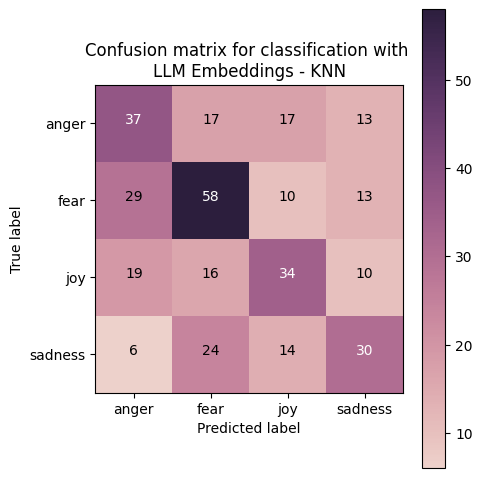

In [158]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [159]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [160]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [161]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [162]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [163]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [164]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [165]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.3477 - loss: 1.5074 - val_accuracy: 0.4813 - val_loss: 1.1965
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6143 - loss: 0.9131 - val_accuracy: 0.4986 - val_loss: 1.2278
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7036 - loss: 0.7235 - val_accuracy: 0.5504 - val_loss: 1.1530
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7654 - loss: 0.6034 - val_accuracy: 0.5764 - val_loss: 1.1872
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8276 - loss: 0.4754 - val_accuracy: 0.5562 - val_loss: 1.3245
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3826 - val_accuracy: 0.5965 - val_loss: 1.3552
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8767 - loss: 0.3347 - val_accuracy: 0.5706 - val_loss: 1.4740
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 0.2846 - val_accuracy: 

In [167]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


array([[1.1633637e-02, 5.1761311e-01, 5.1926647e-04, 4.7023395e-01],
       [2.0305894e-02, 4.0377590e-01, 6.5525883e-04, 5.7526290e-01],
       [5.5914438e-01, 4.2914286e-01, 1.1671340e-02, 4.1417250e-05],
       [1.5488887e-12, 1.0000000e+00, 5.3817264e-13, 3.3613574e-08],
       [8.9964503e-01, 2.0491365e-02, 7.6044992e-02, 3.8186191e-03]],
      dtype=float32)

In [168]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'anger', 'fear', 'anger'], dtype=object)

In [169]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.58


In [170]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.420426,1.279797,0.481268,1.196542
1,1,0.630224,0.898145,0.498559,1.227767
2,2,0.709106,0.722683,0.550432,1.152968
3,3,0.764462,0.606972,0.576369,1.187216
4,4,0.815666,0.489207,0.556196,1.324454
5,5,0.855522,0.401469,0.596542,1.355246
6,6,0.868530,0.353399,0.570605,1.473982
7,7,0.904235,0.281917,0.576369,1.474218
8,8,0.917243,0.241397,0.573487,1.639702
9,9,0.929975,0.205181,0.550432,1.941252


In [171]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.56      0.58      0.57        84
        fear       0.68      0.60      0.64       110
         joy       0.57      0.63      0.60        79
     sadness       0.48      0.49      0.48        74

    accuracy                           0.58       347
   macro avg       0.57      0.58      0.57       347
weighted avg       0.58      0.58      0.58       347



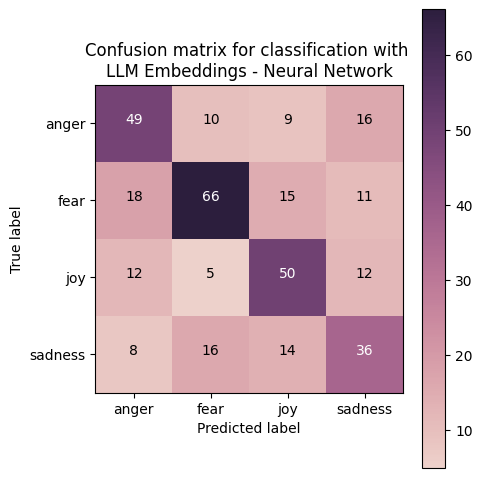

In [172]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

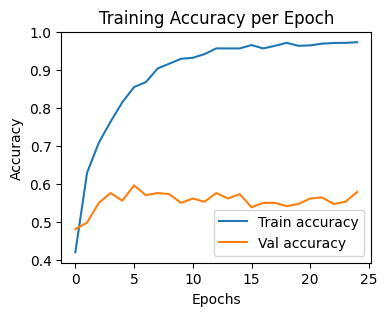

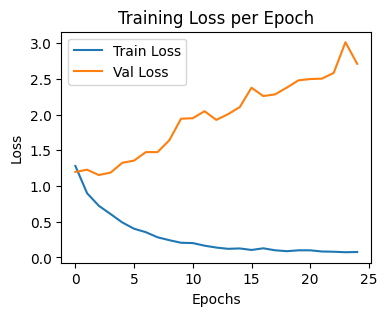

In [174]:
# Answer here
'''
KNN suffers from the curse of dimensionality when applied to high-dimensional data.
  As the dimensionality increases, the distances between data points become more similar,
  reducing the model's ability to differentiate between classes. In contrast, NN, with its
  multi-layer structure and non-linear activation layers, can approximate any hypothesis
  and demonstrates excellent predictive ability for high-dimensional data.

  In this experiment, the sentence embeddings have 3072 features. The results show that the
  performance of NN significantly surpasses that of KNN, which aligns with its capability
  to handle high-dimensional data effectively.
'''

training_log = pd.read_csv("logs/training_log_2.csv")

training_log[["accuracy", "val_accuracy"]].plot(figsize=(4, 3), title="Training Accuracy per Epoch")
plt.legend(["Train accuracy", "Val accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

training_log[["loss", "val_loss"]].plot(figsize=(4, 3), title="Training Loss per Epoch")
plt.legend(["Train Loss", "Val Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

KNN suffers from the curse of dimensionality when applied to high-dimensional data. As the dimensionality increases, the distances between data points become more similar, reducing the model's ability to differentiate between classes. In contrast, NN, with its multi-layer structure and non-linear activation layers, can approximate any hypothesis and demonstrates excellent predictive ability for high-dimensional data.

In this experiment, the sentence embeddings have 3072 features. The results show that the performance of NN significantly surpasses that of KNN, which aligns with its capability to handle high-dimensional data effectively.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



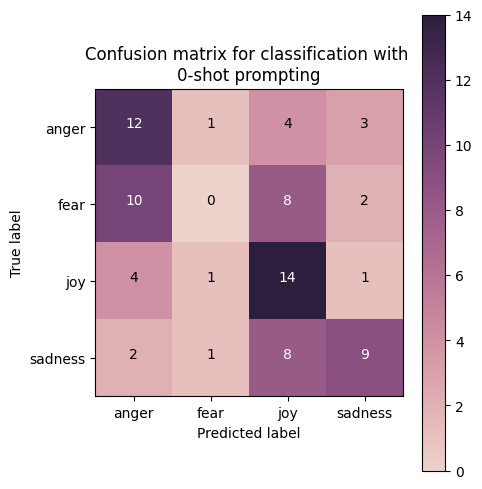

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

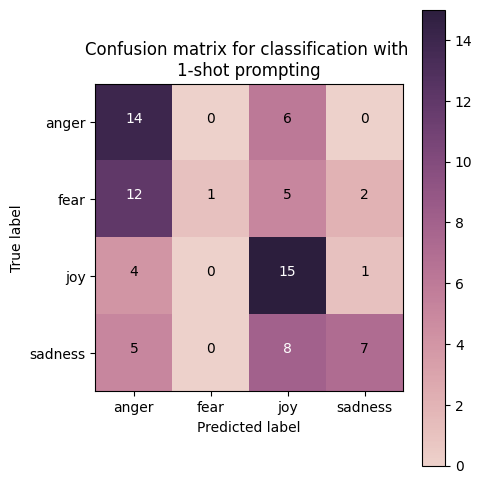

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

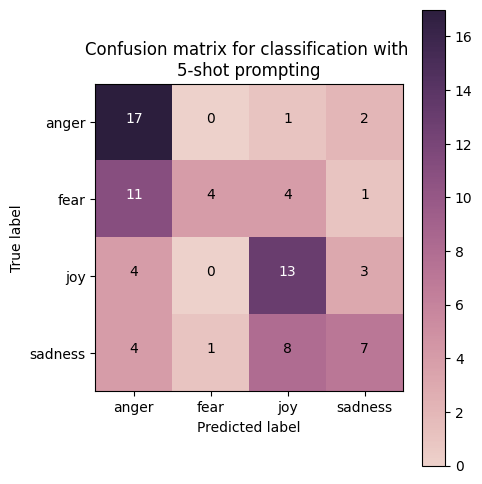

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
'''
The accuracy steadily improves as more examples (shots) are provided,
  which aligns with the expected behavior of models benefiting from
  additional examples(context).
'''

The accuracy steadily improves as more examples (shots) are provided, which aligns with the expected behavior of models benefiting from additional examples(context).

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---